In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, neighbors, metrics
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

knn_comparison to check knn on different set of data with different k values.

In [ ]:
def knn_comparison(data, n_neighbors = 15):
    
#  X and y where X having first 2 columns and y has last or 3rd column
    X = data[:,:2]
    y = data[:,2]
    
    
   
    h = .02  # step size in the mesh (grid cell size)   
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF']) #having light colors
    cmap_bold = ListedColormap(['#FF0000', '#0000FF']) # having above matching shades of dark colors

    #initialise KNN classifier with n_neighbors as its parameters
    # fit the KNN with X and y
    clf = neighbors.KNeighborsClassifier(n_neighbors)  
    clf.fit(X,y)
    
#   Get  minimum value-1 and maximum value+1 from X's 0th column 
    x_min, x_max = X[:,0].min() -1, X[:,0].max()+1 #Gives the boundary
    
    # Get  minimum value-1 and maximum value+1 from X's 1th column 
    y_min, y_max = X[:,1].min() -1, X[:,1].max()+1
    
    '''
    
    we create a mesh grid (x_min,x_max) and (y_min y_max) with 0.02 grid spaces.
    which you defined already in h variable.

    ''' 
    xx, yy = np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min, y_max,h) )
    
    
    
    ''' we predict the value (either 0 or 1) of each element in the gridl
    '''
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])#ravel flattens the array, np.c_= For predicying we need both X0 & X1

    
    # convert the output back to the xx shape as we need it to plot the decision boundry)
    Z = Z.reshape(xx.shape)
    
    
    '''plot our descision boudries using pcolormesh function
      
    '''
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    # scatter plot of with given points i.e having 1st and 2nd columns of X, c as y and cmap as cmap_bold
    plt.scatter(X[:,0], X[:,1],c=y,cmap=cmap_bold)
    
    
    #defining scale on both axises with x limited to xx's min and max values and y limited to yy'ss min and max values
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

   
    #K values = n_neighbors
    plt.title('K value: ' + str(n_neighbors))
    plt.show()

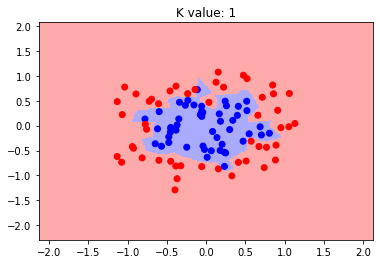

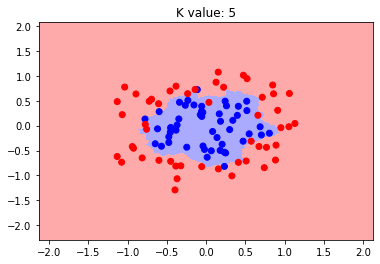

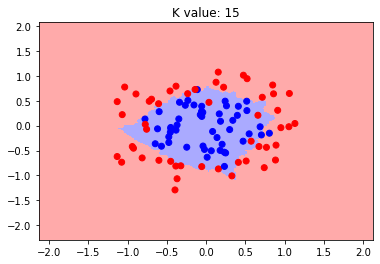

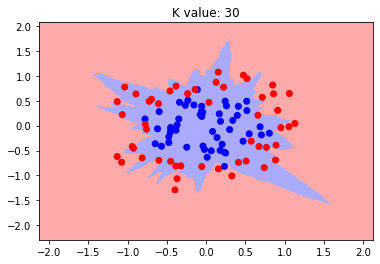

In [ ]:
data = data = np.genfromtxt('concerticcir1.csv', delimiter=',')
knn_comparison(data,1) 
knn_comparison(data,5)  
knn_comparison(data,15) 
knn_comparison(data,30) 

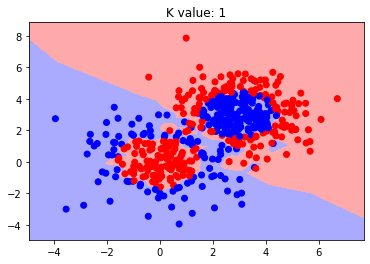

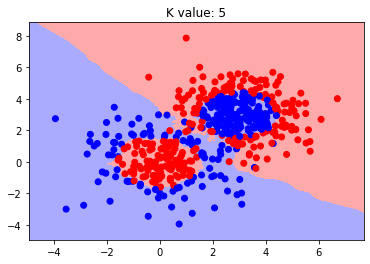

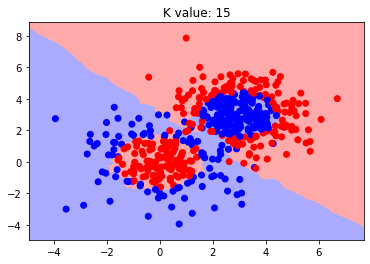

In [ ]:
data = data = np.genfromtxt('concertriccir2.csv', delimiter=',')
knn_comparison(data,1) 
knn_comparison(data,5)  
knn_comparison(data,15) 

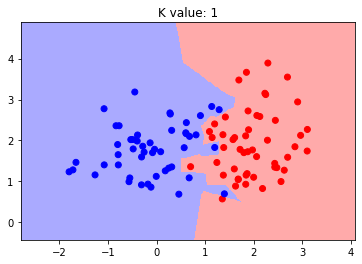

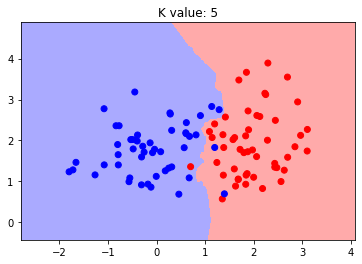

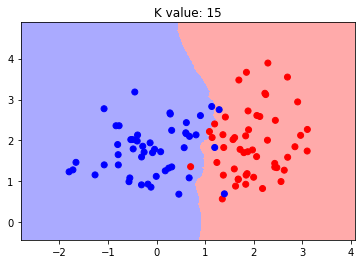

In [ ]:
data = data = np.genfromtxt('linearsep.csv', delimiter=',')
knn_comparison(data,1) 
knn_comparison(data,5)  
knn_comparison(data,15) 

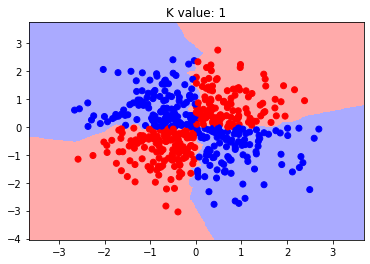

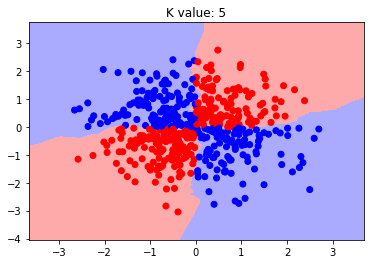

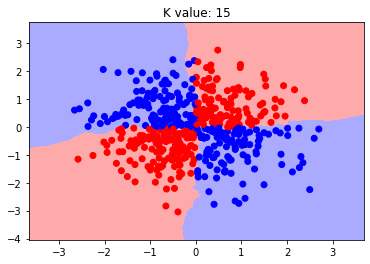

In [ ]:
data = np.genfromtxt('xor.csv', delimiter=',')
knn_comparison(data,1) 
knn_comparison(data,5)  
knn_comparison(data,15) 

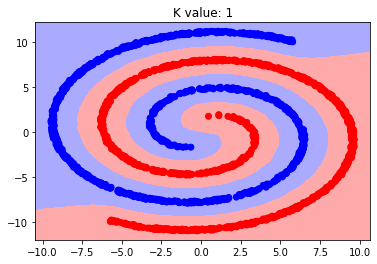

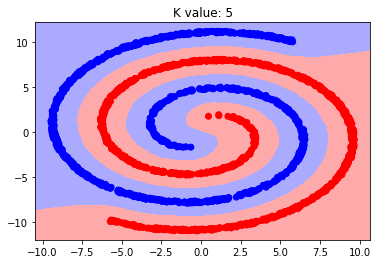

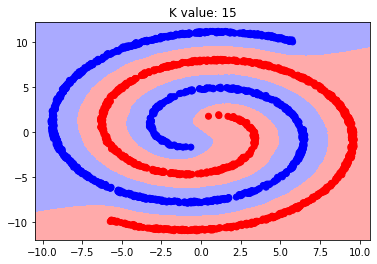

In [ ]:
data = data = np.genfromtxt('twospirals.csv', delimiter=',')
knn_comparison(data,1) 
knn_comparison(data,5)  
knn_comparison(data,15) 

the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
X = dataset.iloc[:,1:4]
y = dataset['Purchased']

In [ ]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender']=le.fit_transform(X['Gender'])

In [ ]:
X['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 ,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

    p = 1 , Manhattan Distance
    p = 2 , Euclidean Distance
    p = infinity , Cheybchev Distance

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(y_test,y_pred)

ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)


0.9166666666666666
[[68  5]
 [ 5 42]]


Well though our model seems performing really good with 91.66% accuracy

Finding better value of K:

In [ ]:
k_range = range(1,26)#K=1 through K=25 and record testing accuracy

scores = []# empty list to append scores

# loop through k_range
for k in k_range:
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=k) #Initiate KNN with n_neighbors as k

    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    
    scores.append(metrics.accuracy_score(y_test,y_pred)) #append the scores in the dictionary in list

print(scores)


[0.8833333333333333, 0.825, 0.9083333333333333, 0.925, 0.9166666666666666, 0.9166666666666666, 0.925, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8583333333333333, 0.8666666666666667]


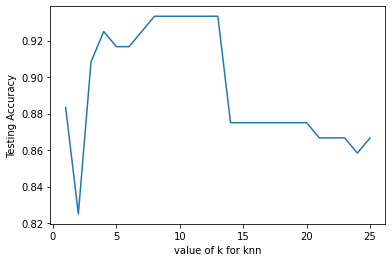

In [ ]:
#relationship between K and testing accuracy
plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('Testing Accuracy')
plt.show()

k value after 8 increases the accuracy and same accuracy is maintained till k=12.k value 8 is perfect  to solve our problem

